# Detecção de Fraudes em Cartões de Crédito

Estamos em 2020, e a cada dia que passa surgem novas tecnologias para facilitar as nossas vidas. O que antigamente ninguém pensava que seria comum, como por exemplo: fazer compras sem sair do conforto de sua casa e realizar pagamentos acessando a sua conta do banco pela internet, hoje é uma realidade muito mais do que consolidada. Ao mesmo tempo que com o avanço tecnológico temos acesso a estas facilidades no nosso dia a dia, a tecnologia também é aperfeiçoada para o uso indevido ao ponto de vista da legalidade.

Segundo a matéria da página [Época Negócios](https://epocanegocios.globo.com/Brasil/noticia/2019/08/fraudes-financeiras-geraram-um-prejuizo-de-cerca-de-r-18-bilhao-em-12-meses.html), realizada em 2019, 46% dos internautas brasileiros foram vítimas de algum tipo de golpe financeiro nos 12 meses anteriores ao estudo, o que equivale a um universo aproximado de 12,1 milhões de pessoas. Com isso, estima-se que o prejuízo total decorrente de fraudes financeiras chegue a cerca de R$ 1,8 bilhão.

Entre esses golpes, aqueles que envolvem cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira. Um outro fator a ser considerado é a quantidade de vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente, o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade na área da Ciência de Dados. Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve
from scikitplot.metrics import plot_confusion_matrix, plot_roc
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set_style('dark')

In [2]:
file = 'datasets/creditcard.csv'

df = pd.read_csv(file)

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(df.isnull().values.sum())

0


In [8]:
print('Valores Únicos: \n')
print(df.nunique().sort_values(ascending = False))

Valores Únicos: 

V15       275663
V2        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V1        275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
V3        275663
Time      124592
Amount     32767
Class          2
dtype: int64


In [9]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [10]:
porc_fraudes = (df[df['Class'] == 1].shape[0] / df.shape[0]) * 100
print(f'O conjunto de dados contém {round(porc_fraudes, 2)}% de transações fraudulentas.')

O conjunto de dados contém 0.17% de transações fraudulentas.


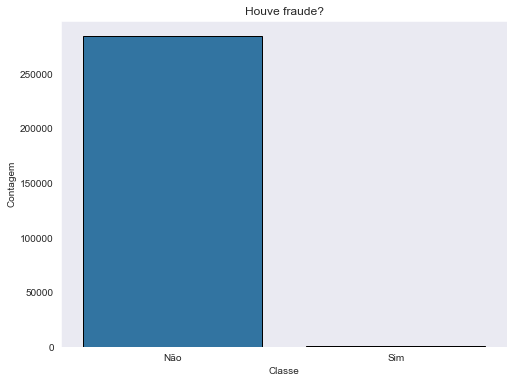

In [11]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.countplot('Class', data = df, ax = ax, edgecolor = (0, 0, 0))
ax.set_title('Houve fraude?')
ax.set_ylabel('Contagem')
ax.set_xlabel('Classe')
ax.set_xticklabels(['Não', 'Sim'])

plt.show()

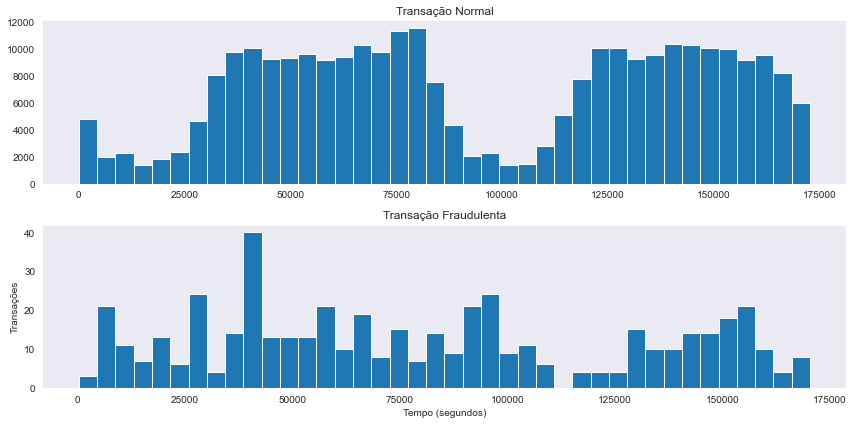

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins = num_bins)
ax[0].set_title('Transação Normal')

ax[1].hist(df.Time[df.Class == 1], bins = num_bins)
ax[1].set_title('Transação Fraudulenta')

plt.ylabel('Transações')
plt.xlabel('Tempo (segundos)')

plt.tight_layout()

In [13]:
Q1 = df['Amount'].quantile(q = 0.25)
print(f'Q1 = {Q1}')

Q3 = df['Amount'].quantile(q = 0.75)
print(f'Q3 = {Q3}')

IQR = Q3 - Q1
print(f'IQR = {IQR}')

outlier_acima = Q3 + 1.5 * IQR
outlier_abaixo =  Q1 - 1.5 * IQR

print(f'Outlier acima: {outlier_acima}')
print(f'Outlier abaixo: {outlier_abaixo}')

Q1 = 5.6
Q3 = 77.16499999999999
IQR = 71.565
Outlier acima: 184.5125
Outlier abaixo: -101.7475


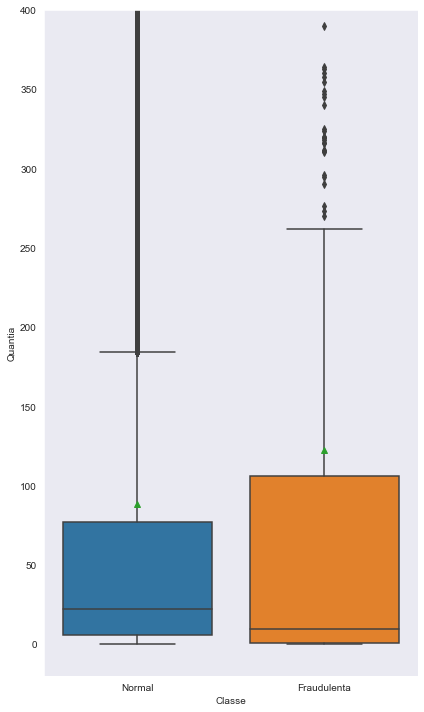

In [14]:
fig, ax = plt.subplots(figsize = (6, 10))

sns.boxplot(y = df['Amount'], x = df['Class'], data = df, showmeans = True, ax = ax)
ax.set_ylim((-20, 400))
ax.set_xlabel('Classe')
ax.set_ylabel('Quantia')
ax.set_xticklabels(['Normal', 'Fraudulenta'])

plt.tight_layout()

In [15]:
df.loc[(df.Class == 1) & (df.Amount < 2000), 'Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

28 colunas.


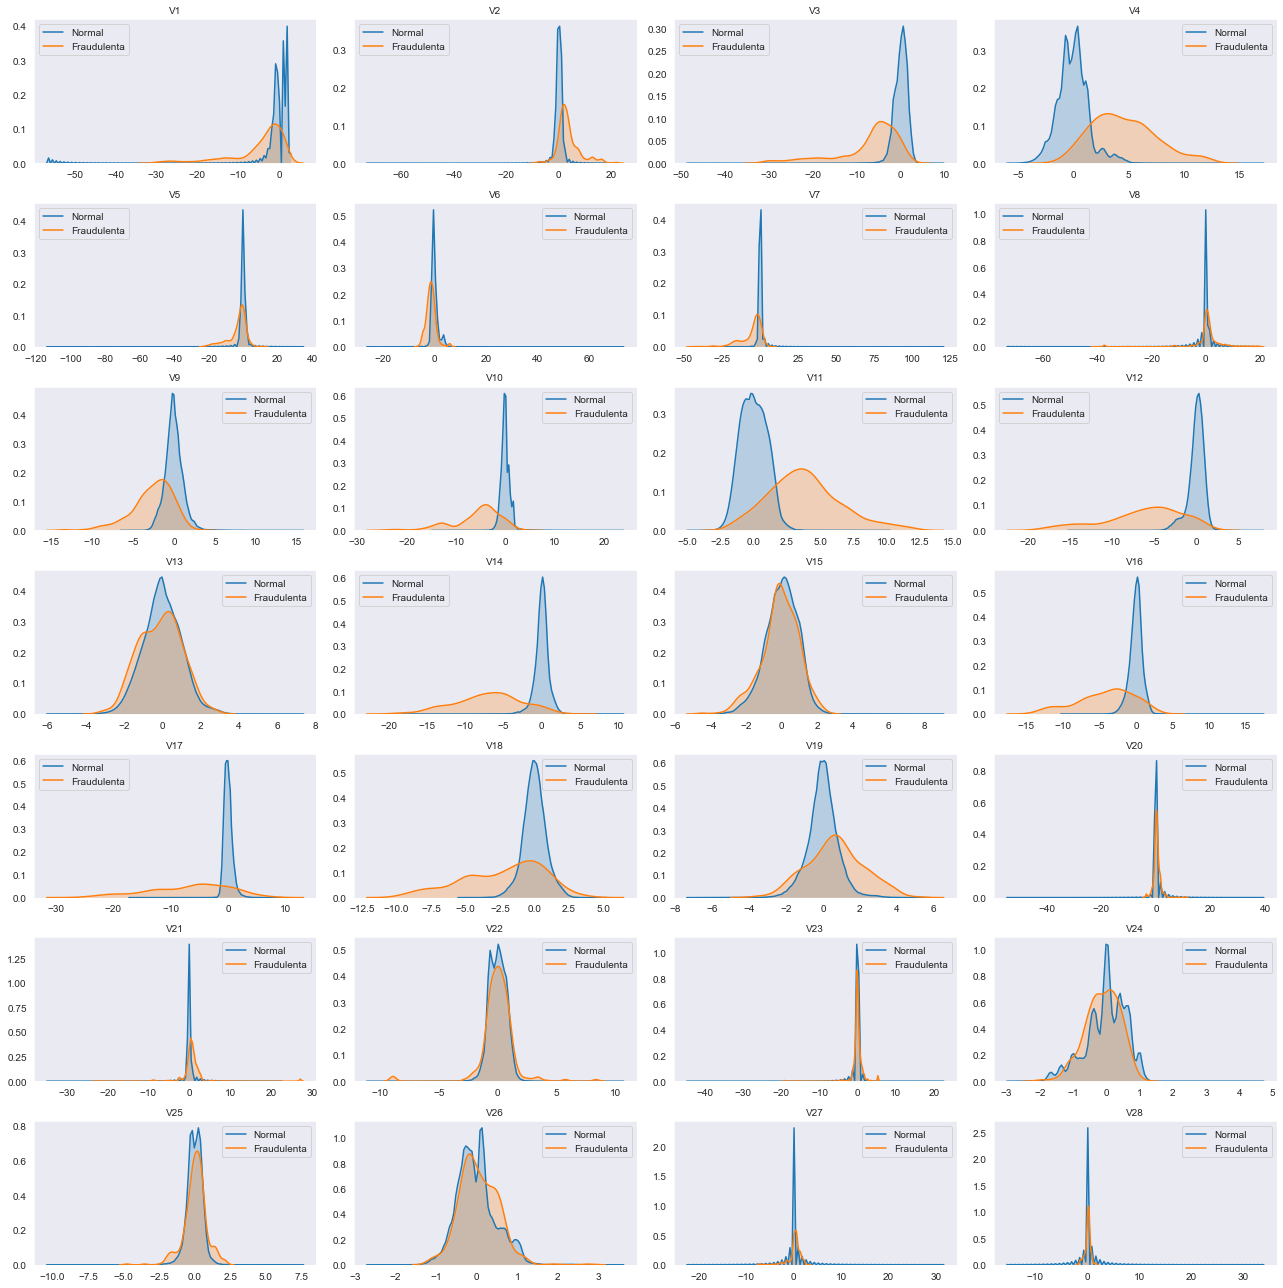

In [16]:
columns_names = df.drop(['Time', 'Amount', 'Class'], axis = 1).columns
num_plots = len(columns_names)
print(f'{num_plots} colunas.')

df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows = 7, ncols = 4, figsize = (18, 18))
fig.subplots_adjust(hspace = 1, wspace = 1)

idx = 0
for col in columns_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label = 'Normal', shade = True)
    sns.kdeplot(df_class_1[col], label = 'Fraudulenta', shade = True)
    plt.title(col, fontsize = 10)
plt.tight_layout()

In [17]:
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [18]:
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [19]:
X = df_clean.drop('Class', axis = 1)
y = df_clean['Class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True)

In [21]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

y_train_rus.value_counts()

1    369
0    369
Name: Class, dtype: int64

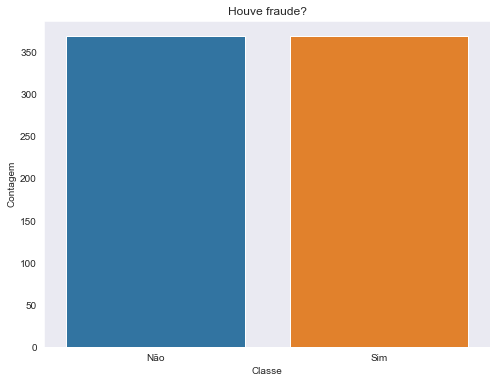

In [22]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.countplot(y_train_rus, ax = ax)
ax.set_title('Houve fraude?')
ax.set_ylabel('Contagem')
ax.set_xlabel('Classe')
ax.set_xticklabels(['Não', 'Sim'])

plt.show()

In [23]:
def val_model(X, y, clf, metric):
    
    X = np.array(X)
    y = np.array(y)
    
    pipeline = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipeline, X, y, scoring = metric)
    
    return scores.mean()

In [24]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

In [25]:
model = []
recall = []
precision = []
accuracy = []

for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model(X_train_rus, y_train_rus, clf, metric = "recall"))
    precision.append(val_model(X_train_rus, y_train_rus, clf, metric = "precision"))
    accuracy.append(val_model(X_train_rus, y_train_rus, clf, metric = "accuracy"))

In [26]:
df_metrics = pd.DataFrame(index = model)

df_metrics['Recall'] = recall
df_metrics['Precision'] = precision
df_metrics['Accuracy'] = accuracy

df_metrics

,Recall,Precision,Accuracy
RandomForestClassifier,0.902518,0.976008,0.932295
DecisionTreeClassifier,0.907923,0.898755,0.909193
SGDClassifier,0.902481,0.921304,0.880658
SVC,0.894372,0.973226,0.934997
LogisticRegression,0.905220,0.967912,0.937691
XGBClassifier,0.913365,0.960192,0.937728
LGBMClassifier,0.918771,0.973929,0.947187


In [27]:
np.random.seed(2)

lr = LogisticRegression()

lr.fit(X_train_rus, y_train_rus)

y_pred = lr.predict(X_test)

In [28]:
print('Relatório de Classificação:\n', classification_report(y_test, y_pred, digits = 4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9618    0.9805     71079
           1     0.0403    0.9268    0.0772       123

    accuracy                         0.9617     71202
   macro avg     0.5201    0.9443    0.5288     71202
weighted avg     0.9982    0.9617    0.9789     71202



In [29]:
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Acurácia: 0.9617

AUC: 0.9443



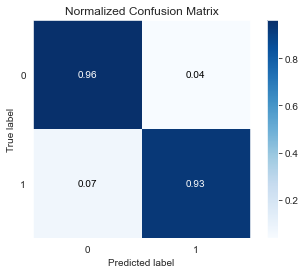

In [30]:
plot_confusion_matrix(y_test, y_pred, normalize = True)
plt.show()